In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3

# Import other libraries
import os
import sys

# Import our own libraries
sys.path.append(os.path.join(os.getcwd(), ".."))
from lib import eyegaze as eg

## Load gaze data recorded by Tobii eye tracker

In [14]:
def plot(target_dir):
  gaze_data = pd.read_csv(target_dir+'tobii_pro_gaze.csv')
  test_data = pd.read_csv(target_dir+'Main Test1.csv')
  time = test_data[['text_time', 'understand_time', 'question_time', 'explanation_time']]
  diff = time.iat[0, 0] - gaze_data.iat[71, 0]
  time_data = time - diff
  len = time_data.shape[1]-1

  for i in range(0, len):
    gaze_data_text = gaze_data[(gaze_data['#timestamp'] >= time_data.iat[0, i]) & (gaze_data['#timestamp'] < time_data.iat[0, i+1])]
    x = gaze_data_text['#timestamp']
    y = gaze_data_text['gaze_x']

    plt.figure(figsize=(20, 30))
    plt.subplot(2*len,1,i*2+1)
    plt.plot(x, y, linewidth=2, color='blue')
    plt.scatter(time_data.iloc[0:1, i:i+2], [200, 1400], c='red', s=100)
    plt.title('Timestamp and gaze x coordinate', fontsize=20)
    plt.xlabel('Timestamp', fontsize=20)
    plt.ylabel('gaze x coordinate', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)

    y = gaze_data_text['gaze_y']
    plt.subplot(2*len,1,i*2+2)
    plt.plot(x, y, linewidth=2, color='blue')
    plt.scatter(time_data.iloc[0:1, i:i+2], [200, 800], c='red', s=100)
    plt.title('Timestamp and gaze y coordinate', fontsize=20)
    plt.xlabel('Timestamp', fontsize=20)
    plt.ylabel('gaze y coordinate', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)

    plt.tight_layout()

  return gaze_data[(gaze_data['#timestamp'] >= time_data.iat[0, 0]) & (gaze_data['#timestamp'] < time_data.iat[0, 1])]

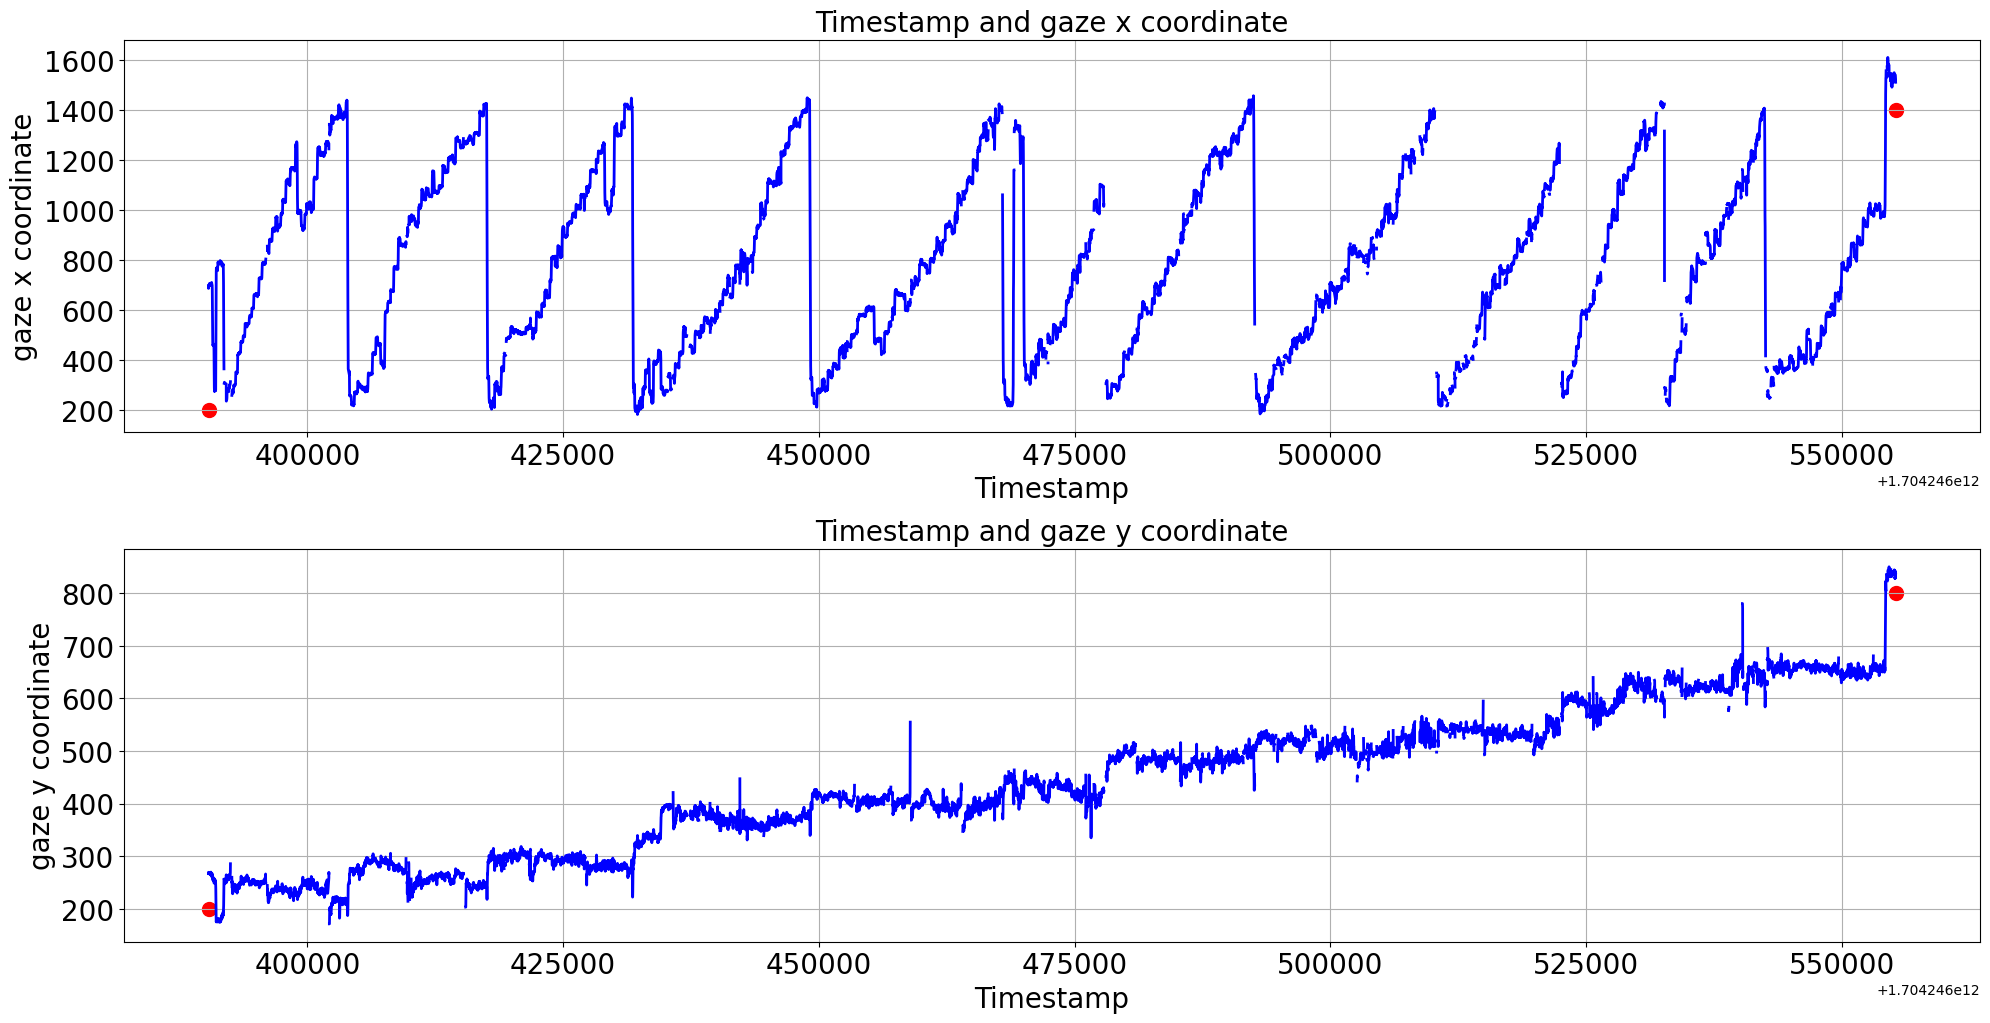

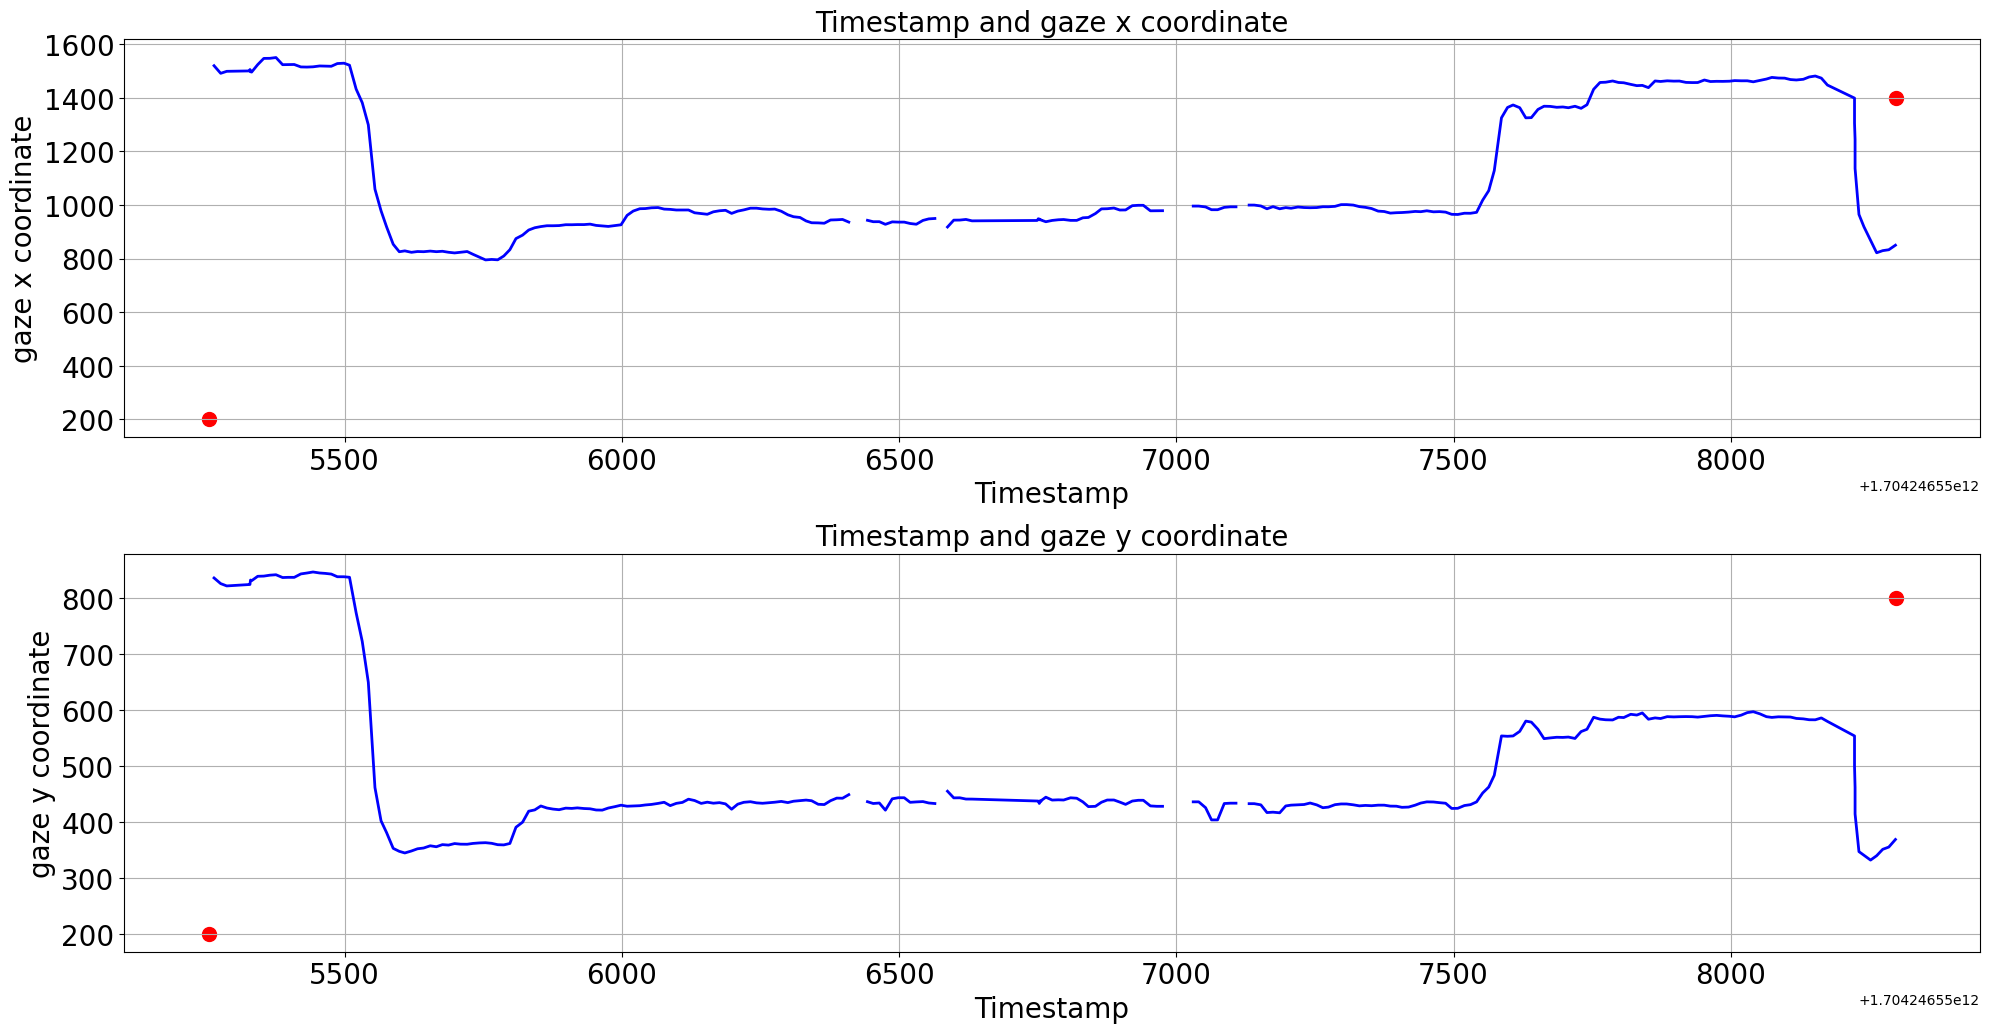

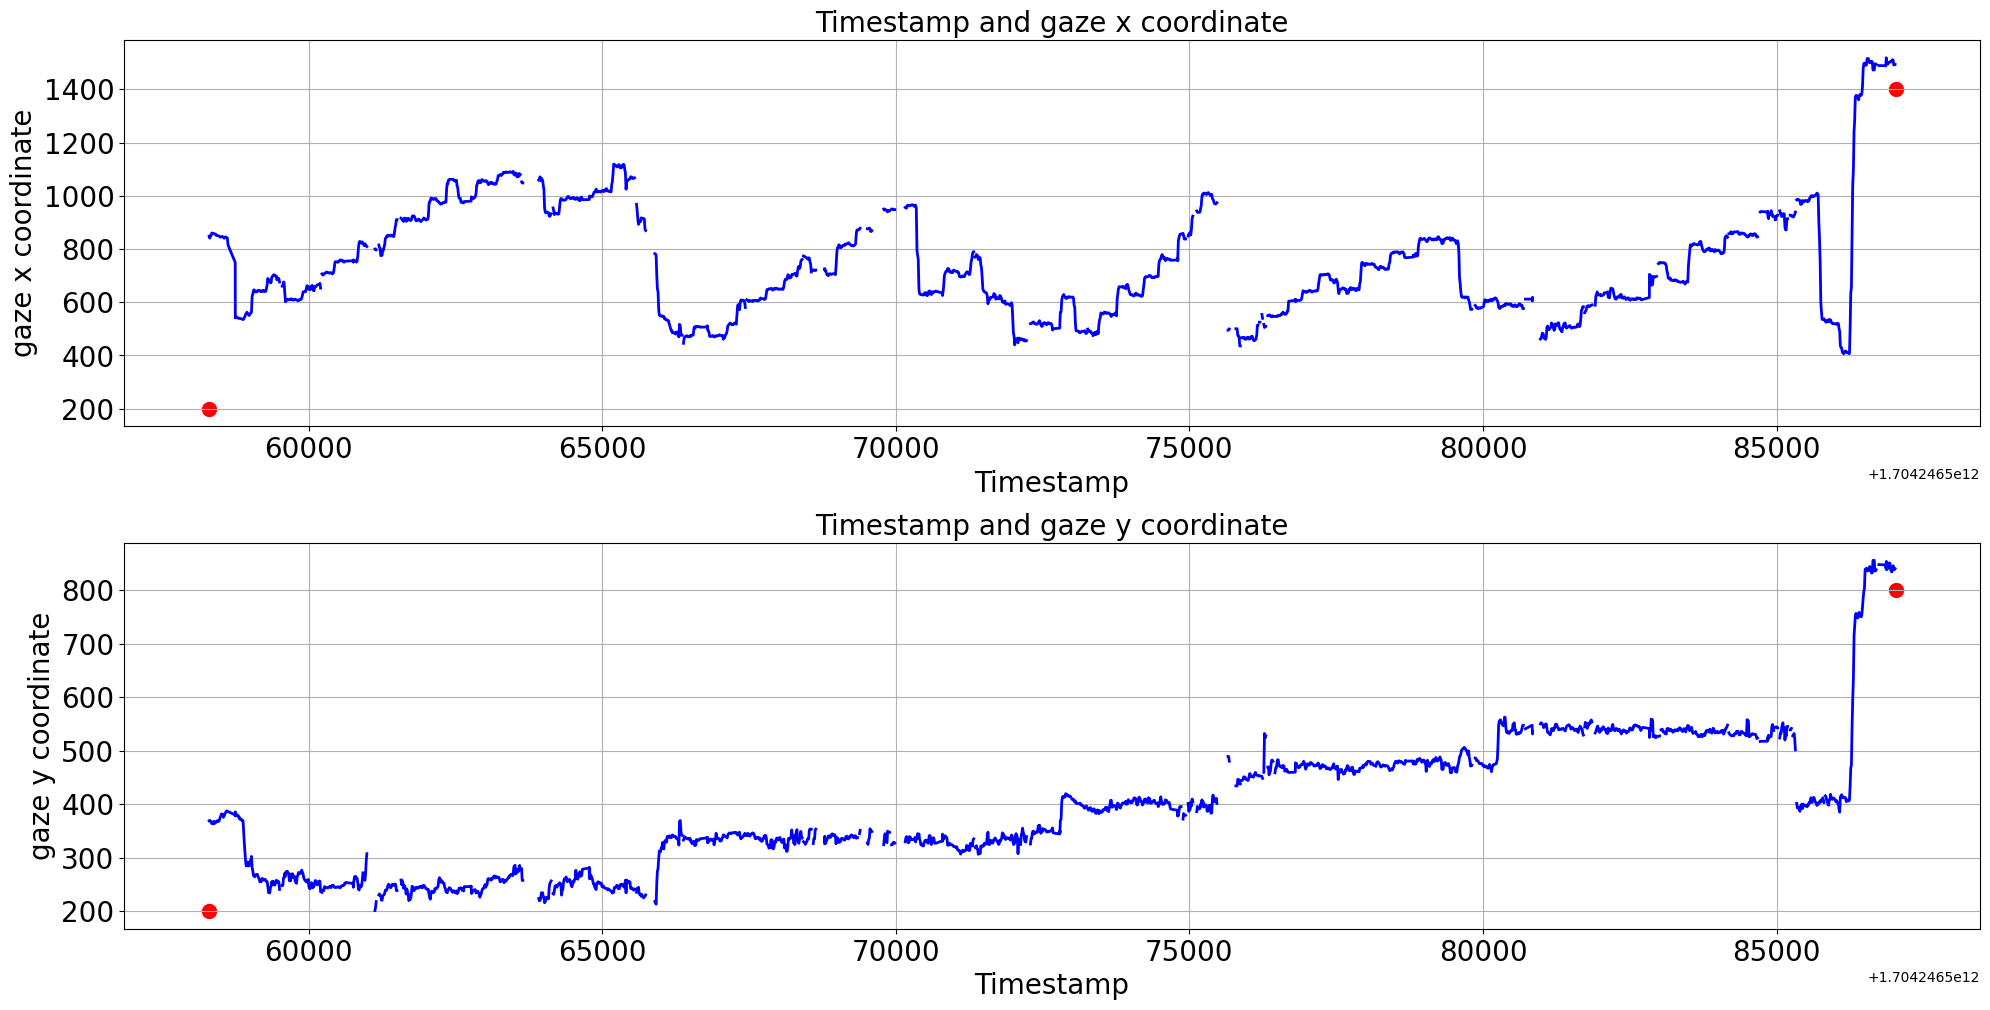

In [15]:
target_dir = "../../data/input/main_test2/"
text_data = plot(target_dir)

## Visualize gaze data

In [33]:
text_data_ = text_data.dropna(subset=['gaze_x', 'gaze_y'])
data = pd.concat([text_data_['#timestamp'], text_data_['gaze_x']*1.25, text_data_['gaze_y']*1.25, text_data_['pupil_diameter']], axis=1).to_numpy()

In [5]:
# Fixation-saccade detection proposed by Buscher et al. (2008)
fx = eg.detectFixations(data[:, 0], data[:, 1], data[:, 2], data[:, 3],
                        min_concat_gaze_count=9, min_fixation_size=50, max_fixation_size=80)

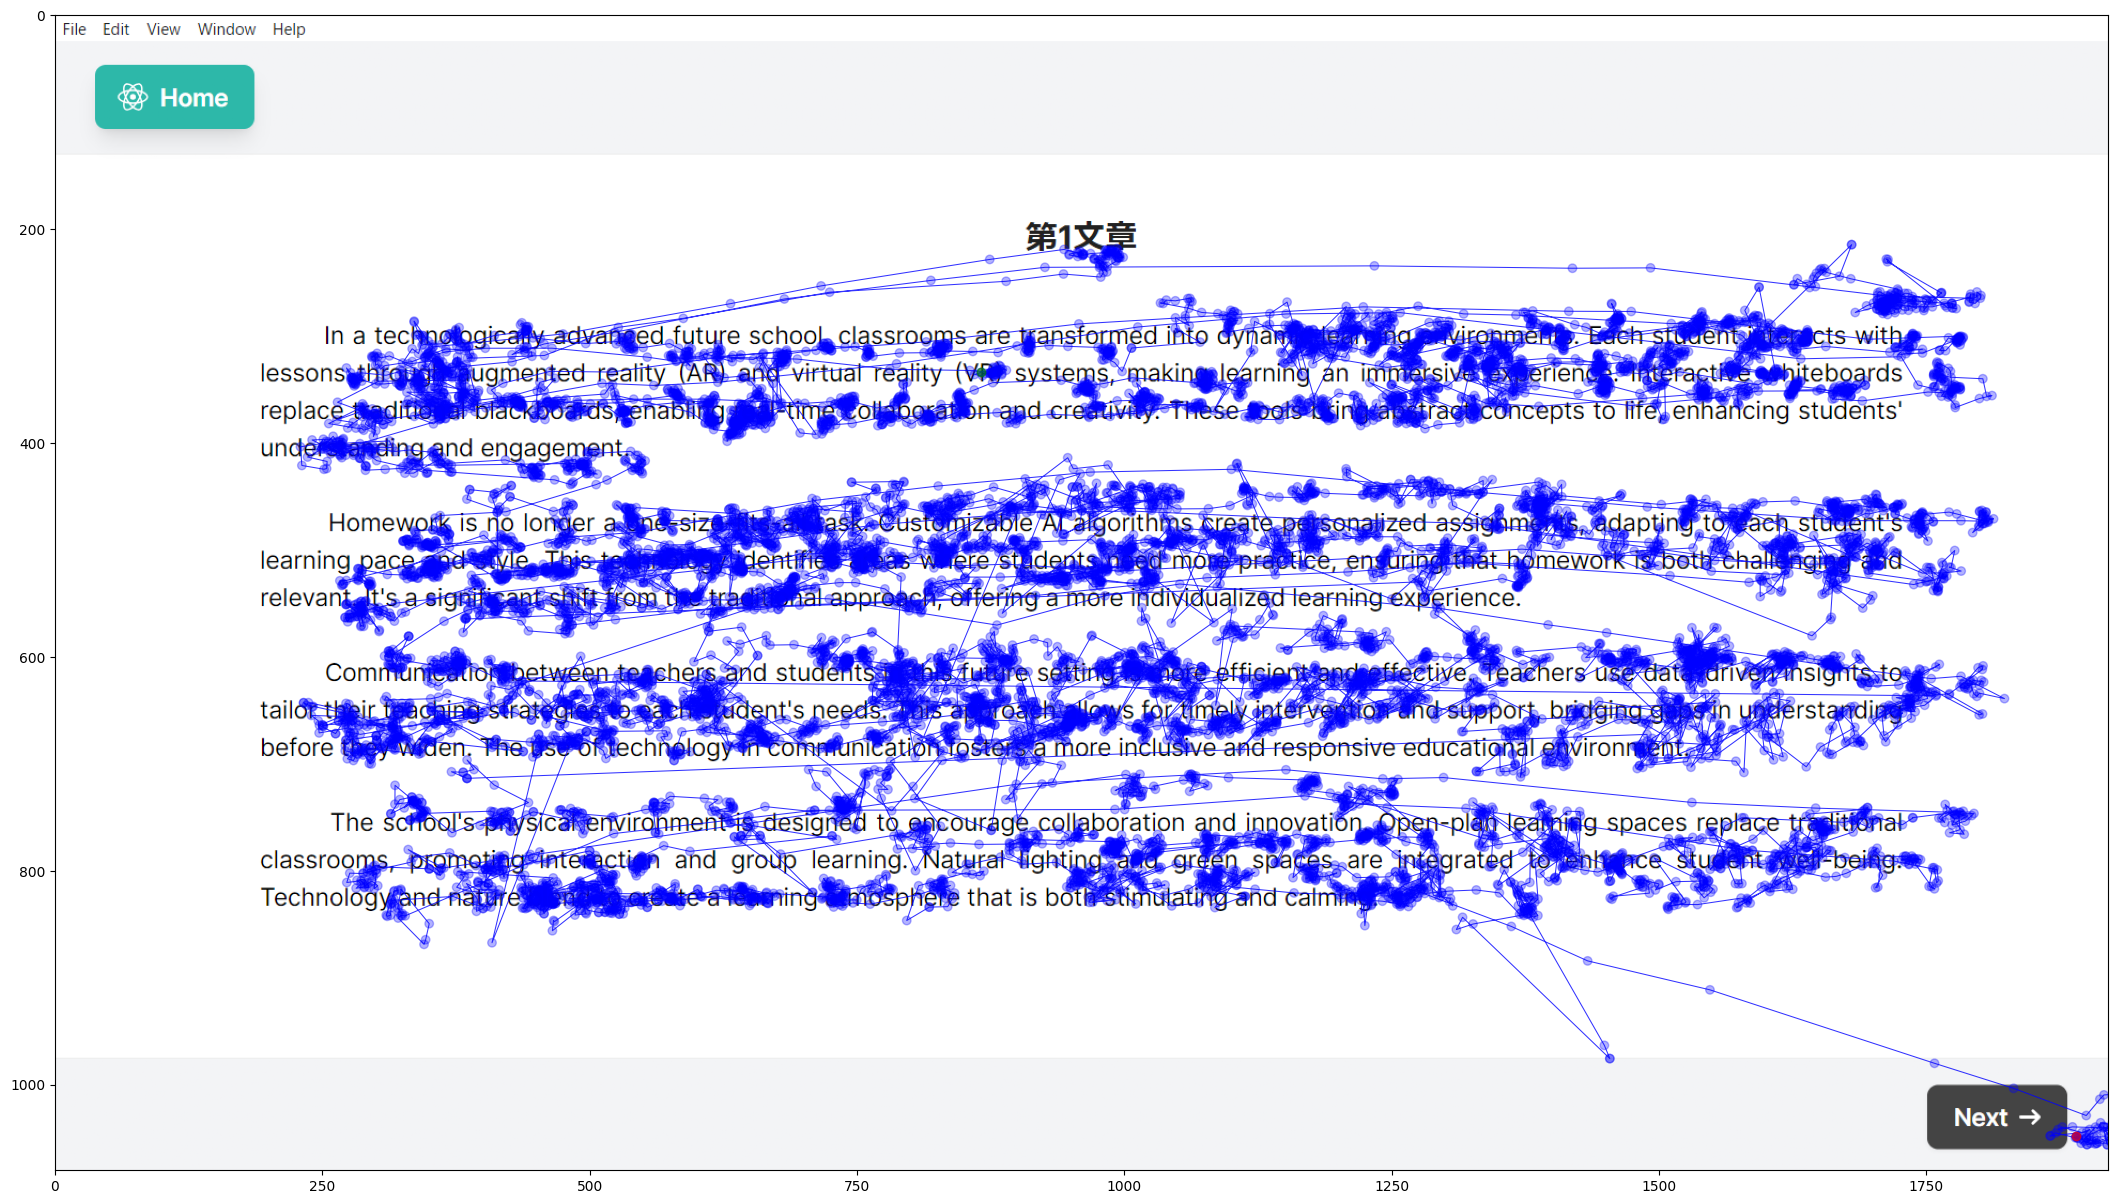

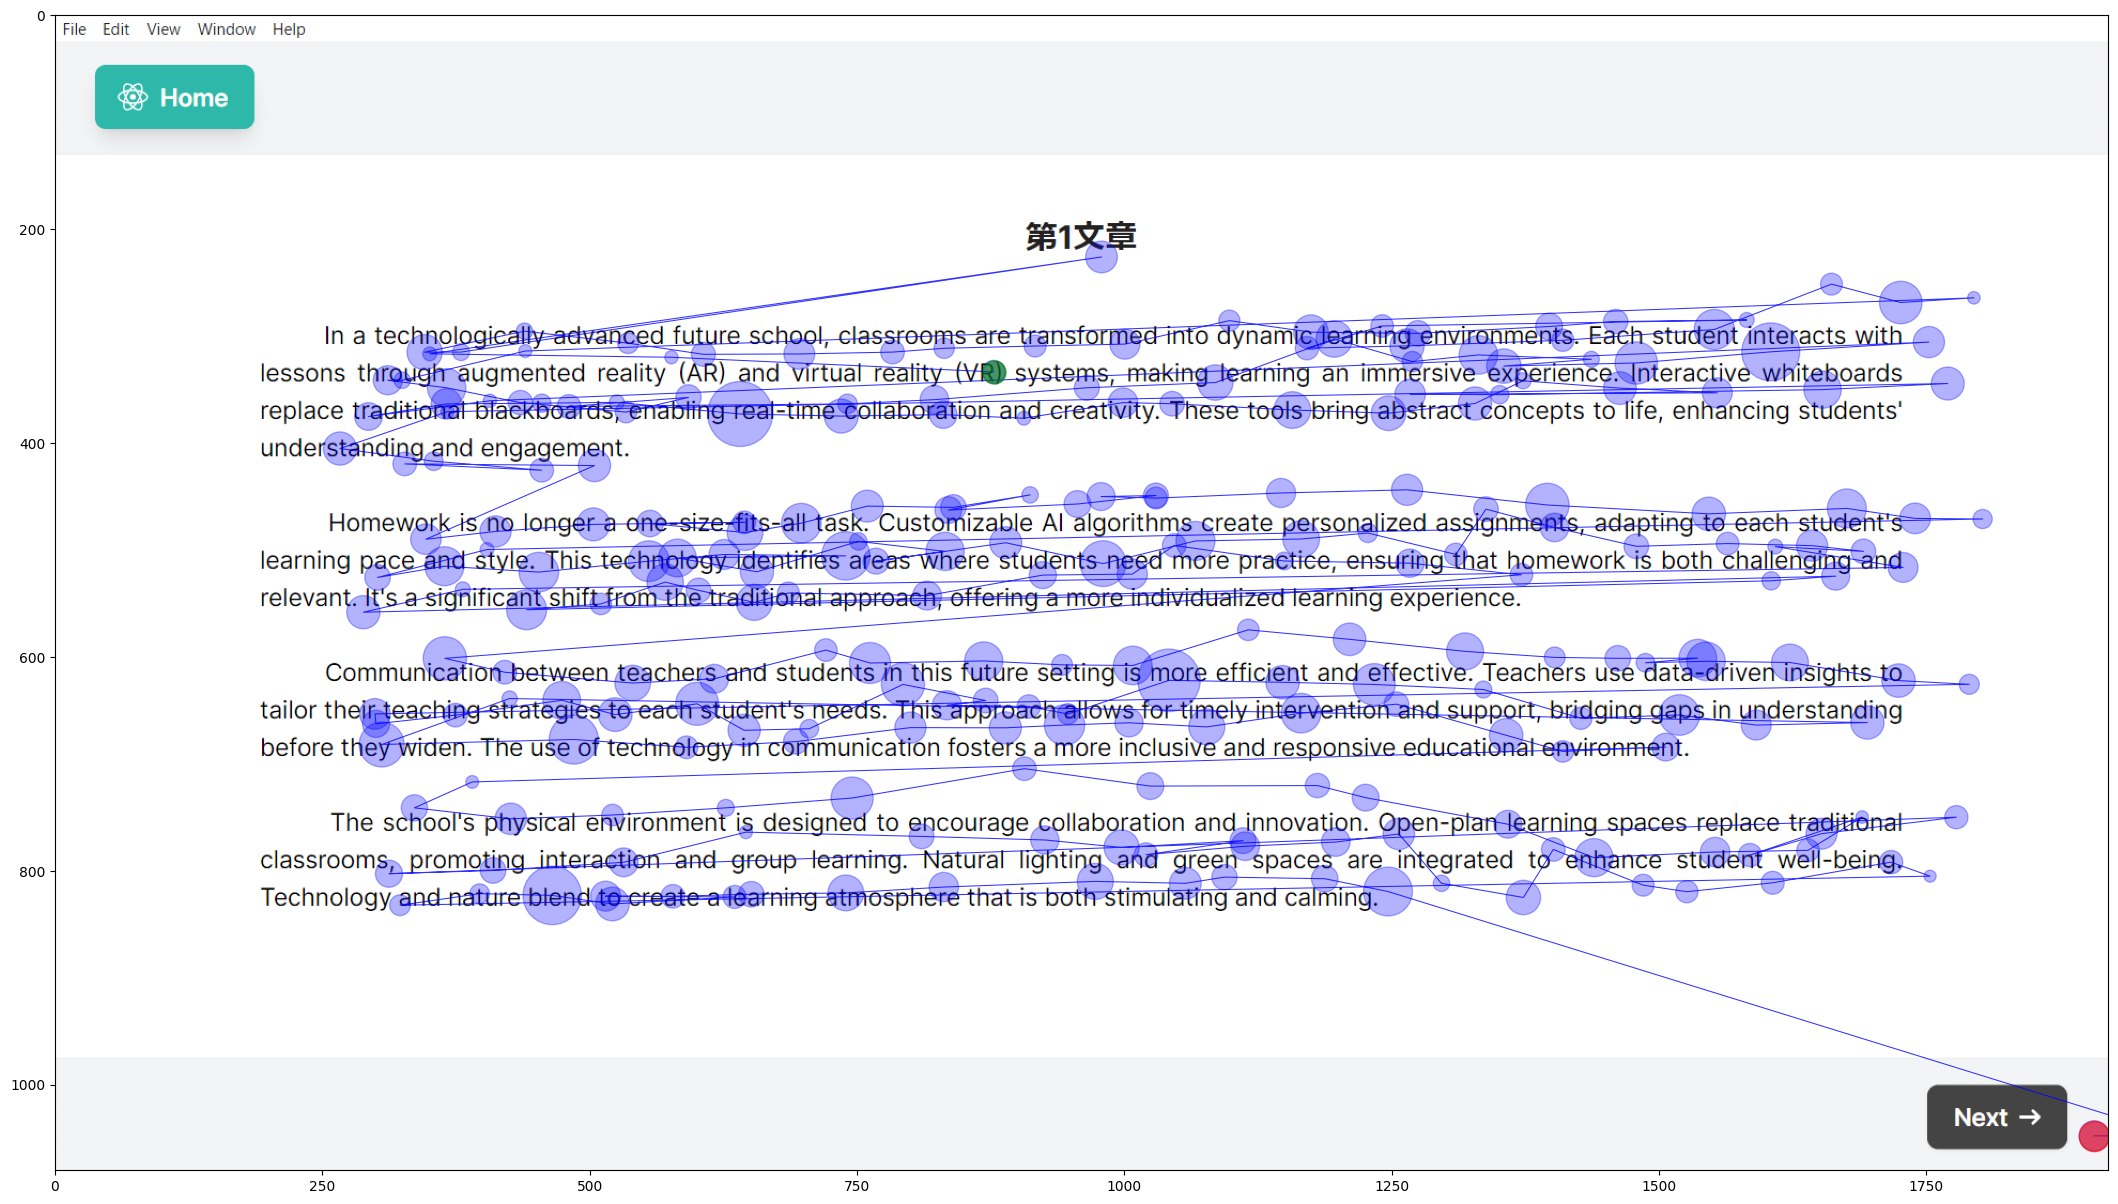

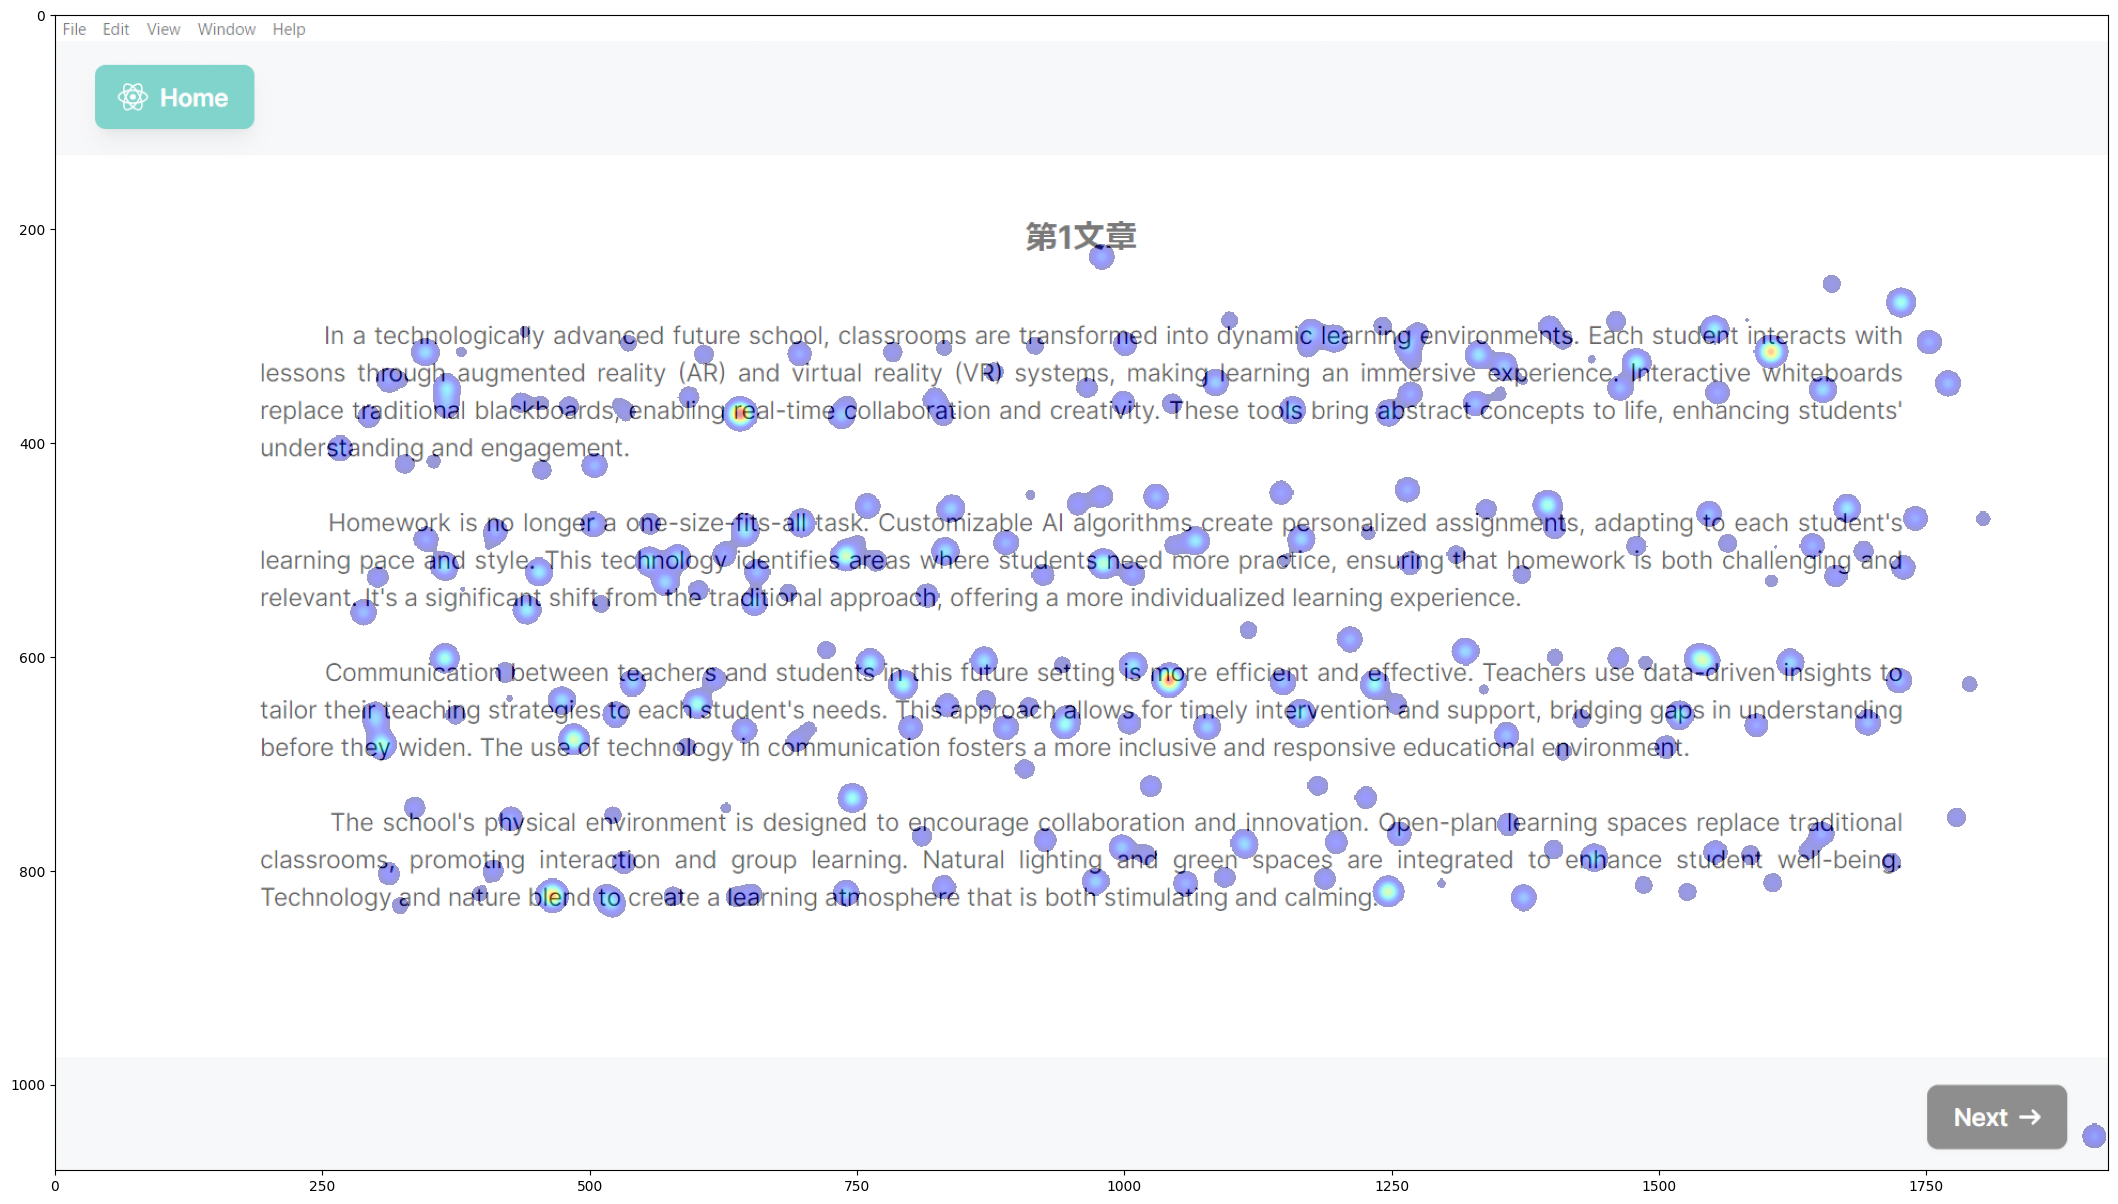

In [6]:
image_path = target_dir+"002_back.png"

eg.plotScanPath(data[:, 1], data[:, 2], np.array([50.0 for x in data]), bg_image=image_path)

eg.plotScanPath(fx[:, 1], fx[:, 2], fx[:, 3], bg_image=image_path)

eg.plotHeatmap(fx[:, 1], fx[:, 2], fx[:, 3], bg_image=image_path)

## Export

In [8]:
bi = str(2).zfill(3)
image_path = target_dir+bi+"_back.png"

od = "../../data/output/gaze_raw/"
if not os.path.exists(od):
  os.makedirs(od)
eg.plotScanPath(data[:, 1], data[:, 2], np.array([50.0 for x in data]),
                bg_image=image_path, save_path=od+bi+".png")

fx = eg.detectFixations(data[:, 0], data[:, 1], data[:, 2], data[:, 3],
                        min_concat_gaze_count=9, min_fixation_size=50, max_fixation_size=80)

od = "../../data/working/fixation/"
if not os.path.exists(od):
  os.makedirs(od)
df = pd.DataFrame(fx, columns = ["#timestamp", "fixation_x", "fixation_y", "fixation_duration", "pupil_diameter", "saccade_length", "saccade_angle", "saccade_velocity"])
df.to_csv(od+bi+".csv", index = False)

od = "../../data/output/scan_path/"
if not os.path.exists(od):
  os.makedirs(od)
eg.plotScanPath(fx[:, 1], fx[:, 2], fx[:, 3],
                bg_image=image_path, save_path=od+bi+".png")

od = "../../data/output/heatmap/"
if not os.path.exists(od):
  os.makedirs(od)
eg.plotHeatmap(fx[:, 1], fx[:, 2], fx[:, 3],
                bg_image=image_path, save_path=od+bi+".png")

In [10]:
def plot(target_dir):
  gaze_data = pd.read_csv(target_dir+'002.csv')

  for i in range(0, 1):
    x = gaze_data['#timestamp']
    y = gaze_data['fixation_x']

    plt.figure(figsize=(20, 10))
    plt.subplot(2,1,1)
    plt.plot(x, y, linewidth=2, color='blue')
    plt.title('Timestamp and gaze x coordinate', fontsize=20)
    plt.xlabel('Timestamp', fontsize=20)
    plt.ylabel('gaze x coordinate', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)

    y = gaze_data['fixation_y']
    plt.subplot(2,1,2)
    plt.plot(x, y, linewidth=2, color='blue')
    plt.title('Timestamp and gaze y coordinate', fontsize=20)
    plt.xlabel('Timestamp', fontsize=20)
    plt.ylabel('gaze y coordinate', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.grid(True)

    plt.tight_layout()

  return gaze_data['#timestamp']

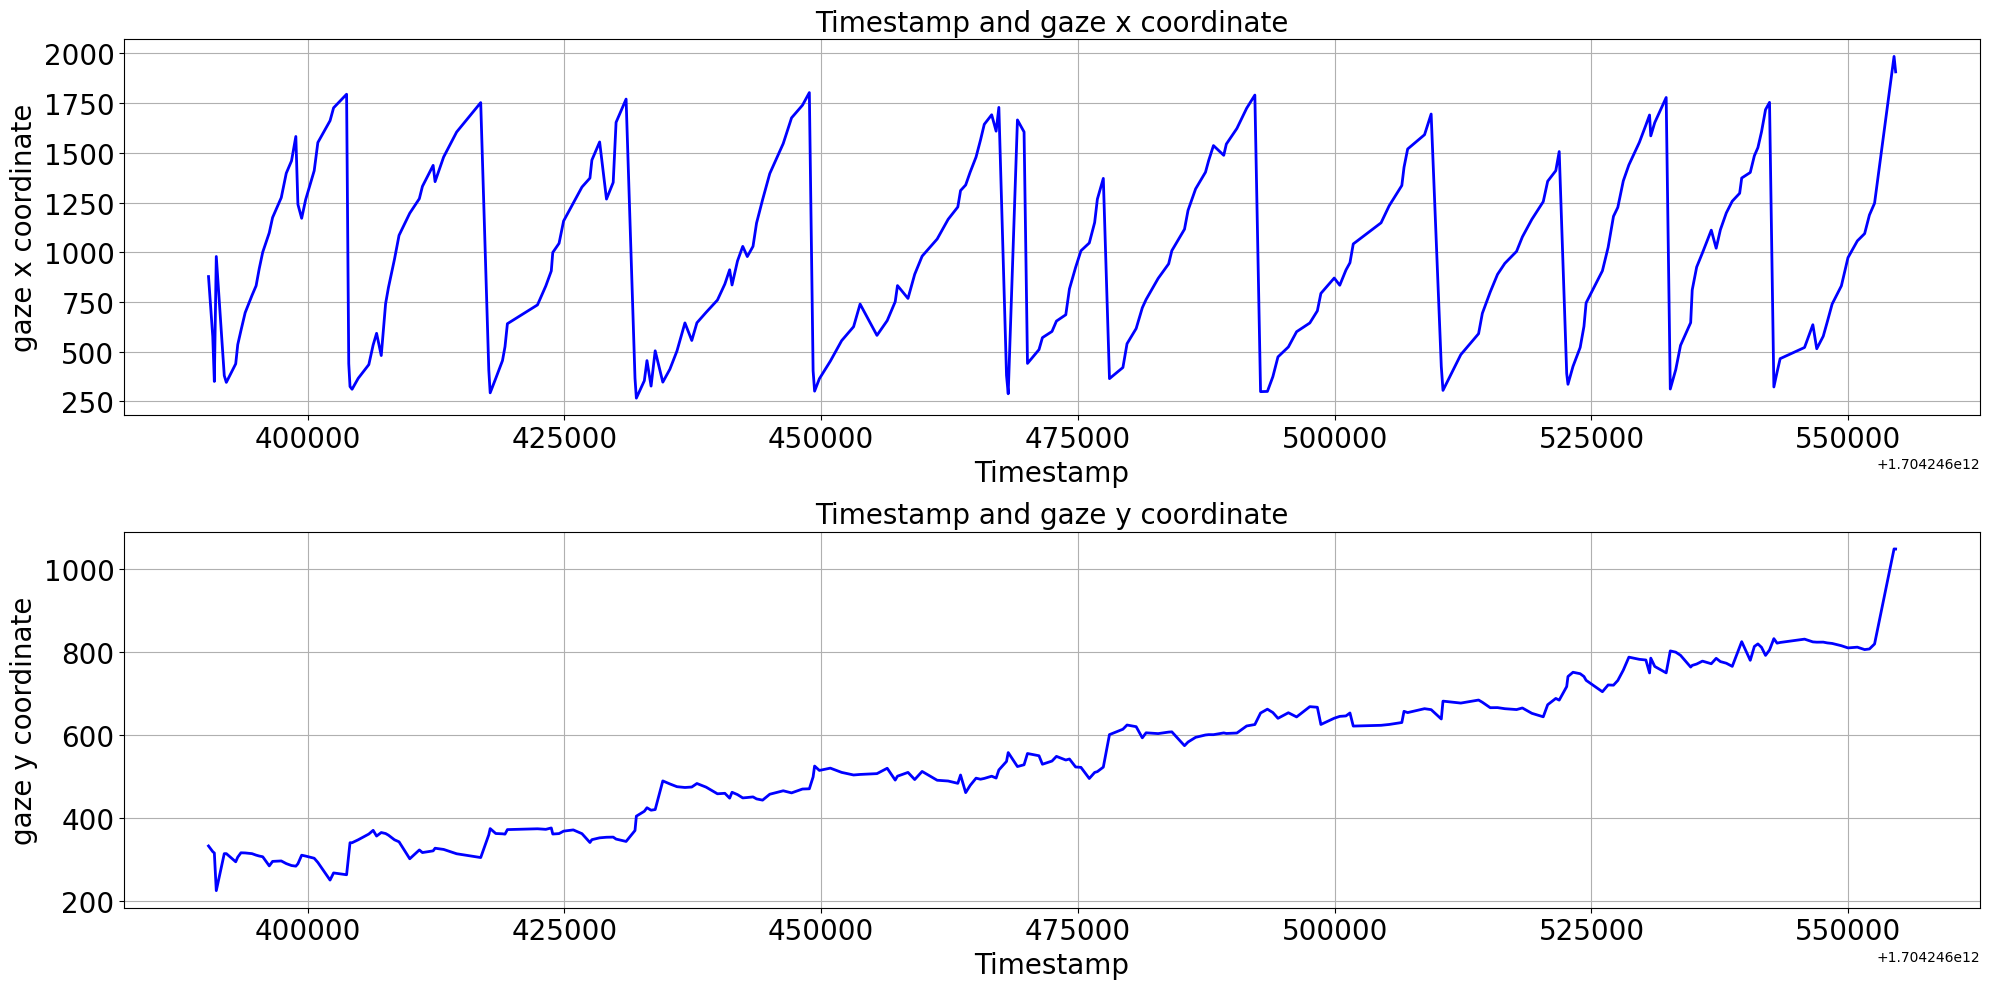

In [11]:
target_dir = "../../data/working/fixation/"
text_data = plot(target_dir)

## Create features

In [114]:
import os
import csv
import pandas as pd
import numpy as np


class MyClass():
  def __init__(self):
    self.f_d_1 = []
    self.f_d_2 = []
    self.f_d_3 = []
    self.f_d_4 = []
    self.f_d_else = []

    self.s_length_f_1 = []
    self.s_length_f_2 = []
    self.s_length_f_3 = []
    self.s_length_f_4 = []
    self.s_length_f_else = []

    self.s_velocity_f_1 = []
    self.s_velocity_f_2 = []
    self.s_velocity_f_3 = []
    self.s_velocity_f_4 = []
    self.s_velocity_f_else = []

    self.s_length_r_1 = []
    self.s_length_r_2 = []
    self.s_length_r_3 = []
    self.s_length_r_4 = []
    self.s_length_r_else = []

    self.s_velocity_r_1 = []
    self.s_velocity_r_2 = []
    self.s_velocity_r_3 = []
    self.s_velocity_r_4 = []
    self.s_velocity_r_else = []

    self.p_1 = []
    self.p_2 = []
    self.p_3 = []
    self.p_4 = []
    self.p_else = []

    self.b_f_1 = []
    self.b_f_2 = []
    self.b_f_3 = []
    self.b_f_4 = []
    self.b_f_else = []

    self.b_i_1 = []
    self.b_i_2 = []
    self.b_i_3 = []
    self.b_i_4 = []
    self.b_i_else = []

    self.blink = []


def feature_calculation(user, understand, answer):
  f1_1 = np.mean(user.f_d_1)
  f1_2 = np.mean(user.f_d_2)
  f1_3 = np.mean(user.f_d_3)
  f1_4 = np.mean(user.f_d_4)

  f2_1 = np.std(user.f_d_1)
  f2_2 = np.std(user.f_d_2)
  f2_3 = np.std(user.f_d_3)
  f2_4 = np.std(user.f_d_4)

  f3_1 = np.mean(user.s_length_f_1)
  f3_2 = np.mean(user.s_length_f_2)
  f3_3 = np.mean(user.s_length_f_3)
  f3_4 = np.mean(user.s_length_f_4)

  f4_1 = np.std(user.s_length_f_1)
  f4_2 = np.std(user.s_length_f_2)
  f4_3 = np.std(user.s_length_f_3)
  f4_4 = np.std(user.s_length_f_4)

  f5_1 = np.mean(user.s_velocity_f_1)
  f5_2 = np.mean(user.s_velocity_f_2)
  f5_3 = np.mean(user.s_velocity_f_3)
  f5_4 = np.mean(user.s_velocity_f_4)

  f6_1 = np.std(user.s_velocity_f_1)
  f6_2 = np.std(user.s_velocity_f_2)
  f6_3 = np.std(user.s_velocity_f_3)
  f6_4 = np.std(user.s_velocity_f_4)

  f7_1 = np.mean(user.s_length_r_1)
  f7_2 = np.mean(user.s_length_r_2)
  f7_3 = np.mean(user.s_length_r_3)
  f7_4 = np.mean(user.s_length_r_4)

  f8_1 = np.std(user.s_length_r_1)
  f8_2 = np.std(user.s_length_r_2)
  f8_3 = np.std(user.s_length_r_3)
  f8_4 = np.std(user.s_length_r_4)

  f9_1 = np.mean(user.s_velocity_r_1)
  f9_2 = np.mean(user.s_velocity_r_2)
  f9_3 = np.mean(user.s_velocity_r_3)
  f9_4 = np.mean(user.s_velocity_r_4)

  f10_1 = np.std(user.s_velocity_r_1)
  f10_2 = np.std(user.s_velocity_r_2)
  f10_3 = np.std(user.s_velocity_r_3)
  f10_4 = np.std(user.s_velocity_r_4)

  f11_1 = len(user.s_length_f_1)
  f11_2 = len(user.s_length_f_2)
  f11_3 = len(user.s_length_f_3)
  f11_4 = len(user.s_length_f_4)

  f12_1 = len(user.s_length_r_1)
  f12_2 = len(user.s_length_r_2)
  f12_3 = len(user.s_length_r_3)
  f12_4 = len(user.s_length_r_4)

  f13_1 = len(user.s_velocity_r_1) / len(user.f_d_1)
  f13_2 = len(user.s_velocity_r_2) / len(user.f_d_2)
  f13_3 = len(user.s_velocity_r_3) / len(user.f_d_3)
  f13_4 = len(user.s_velocity_r_4) / len(user.f_d_4)

  f14_1 = np.mean(user.p_1)
  f14_2 = np.mean(user.p_2)
  f14_3 = np.mean(user.p_3)
  f14_4 = np.mean(user.p_4)

  f15_1 = np.std(user.p_1)
  f15_2 = np.std(user.p_2)
  f15_3 = np.std(user.p_3)
  f15_4 = np.std(user.p_4)

  f16_1 = len(user.b_f_1)
  f16_2 = len(user.b_f_2)
  f16_3 = len(user.b_f_3)
  f16_4 = len(user.b_f_4)

  f17_1 = np.std(user.b_i_1)
  f17_2 = np.std(user.b_i_2)
  f17_3 = np.std(user.b_i_3)
  f17_4 = np.std(user.b_i_4)

  return [f1_1, f1_2, f1_3, f1_4, f2_1, f2_2, f2_3, f2_4, f3_1, f3_2, f3_3, f3_4, f4_1, f4_2, f4_3, f4_4, f5_1, f5_2, f5_3, f5_4, f6_1, f6_2, f6_3, f6_4, f7_1, f7_2, f7_3, f7_4, f8_1, f8_2, f8_3, f8_4, f9_1, f9_2, f9_3, f9_4, f10_1, f10_2, f10_3, f10_4, f11_1, f11_2, f11_3, f11_4, f12_1, f12_2, f12_3, f12_4, f13_1, f13_2, f13_3, f13_4, f14_1, f14_2, f14_3, f14_4, f15_1, f15_2, f15_3, f15_4, f16_1, f16_2, f16_3, f16_4, f17_1, f17_2, f17_3, f17_4, understand, answer]


def fixation_create(raw, fixations, understand, answer, user):
  x = list(fixations["fixation_x"])
  y = list(fixations["fixation_y"])
  duration = list(fixations["fixation_duration"])
  pupil = list(fixations["pupil_diameter"])
  saccade_length = list(fixations["saccade_length"])
  saccade_angle = list(fixations["saccade_angle"])
  saccade_velocity = list(fixations["saccade_velocity"])

  y_0 = 260
  y_1 = 435
  y_2 = 575
  y_3 = 715
  y_4 = 855

  for i in range(len(x)):
    if (y_0 <= y[i] <= y_1):
      user.f_d_1.append(duration[i])
      user.p_1.append(pupil[i])
      if (-90 < saccade_angle[i] <= 90):
        user.s_length_f_1.append(saccade_length[i])
        user.s_velocity_f_1.append(saccade_velocity[i])
      else:
        if (saccade_length[i] < 1000):
          user.s_length_r_1.append(saccade_length[i])
          user.s_velocity_r_1.append(saccade_velocity[i])
    elif (y_1 < y[i] <= y_2):
      user.f_d_2.append(duration[i])
      user.p_2.append(pupil[i])
      if (-90 < saccade_angle[i] <= 90):
        user.s_length_f_2.append(saccade_length[i])
        user.s_velocity_f_2.append(saccade_velocity[i])
      else:
        if (saccade_length[i] < 1000):
          user.s_length_r_2.append(saccade_length[i])
          user.s_velocity_r_2.append(saccade_velocity[i])
    elif (y_2 < y[i] <= y_3):
      user.f_d_3.append(duration[i])
      user.p_3.append(pupil[i])
      if (-90 < saccade_angle[i] <= 90):
        user.s_length_f_3.append(saccade_length[i])
        user.s_velocity_f_3.append(saccade_velocity[i])
      else:
        if (saccade_length[i] < 1000):
          user.s_length_r_3.append(saccade_length[i])
          user.s_velocity_r_3.append(saccade_velocity[i])
    elif (y_3 < y[i] <= y_4):
      user.f_d_4.append(duration[i])
      user.p_4.append(pupil[i])
      if (-90 < saccade_angle[i] <= 90):
        user.s_length_f_4.append(saccade_length[i])
        user.s_velocity_f_4.append(saccade_velocity[i])
      else:
        if (saccade_length[i] < 1000):
          user.s_length_r_4.append(saccade_length[i])
          user.s_velocity_r_4.append(saccade_velocity[i])
    else:
      user.f_d_else.append(duration[i])
      user.p_else.append(pupil[i])
      if (-90 < saccade_angle[i] <= 90):
        user.s_length_f_else.append(saccade_length[i])
        user.s_velocity_f_else.append(saccade_velocity[i])
      else:
        if (saccade_length[i] < 1000):
          user.s_length_r_else.append(saccade_length[i])
          user.s_velocity_r_else.append(saccade_velocity[i])

  diff = list(raw[raw['pupil_diameter'].isnull()].index.diff())
  timestamp = list(raw[raw['pupil_diameter'].isnull()]['#timestamp'])
  gaze_y = list(raw.loc[raw[raw['pupil_diameter'].isnull()].index-1, 'gaze_y'].ffill())
  j = 1
  for i in range(1, len(diff)):
    if (diff[i] == 1.0):
      j += 1
    else:
      if (6 <= j):
        if (y_0 <= gaze_y[i] <= y_1):
          if (user.blink != []):
            user.b_i_1.append(timestamp[i-j] - user.blink[-1])
          user.b_f_1.append(1)
        elif (y_1 < gaze_y[i] <= y_2):
          if (user.blink != []):
            user.b_i_2.append(timestamp[i-j] - user.blink[-1])
          user.b_f_2.append(1)
        elif (y_2 < gaze_y[i] <= y_3):
          if (user.blink != []):
            user.b_i_3.append(timestamp[i-j] - user.blink[-1])
          user.b_f_3.append(1)
        elif (y_3 < gaze_y[i] <= y_4):
          if (user.blink != []):
            user.b_i_4.append(timestamp[i-j] - user.blink[-1])
          user.b_f_4.append(1)
        else:
          if (user.blink != []):
            user.b_i_else.append(timestamp[i-j] - user.blink[-1])
          user.b_f_else.append(1)
        user.blink.append(timestamp[i-1])
      j = 1

  features = feature_calculation(user, understand, answer)

  return features


def save(features):
  if not os.path.exists("../../data/working/feature/"):
    os.makedirs("../../data/working/feature/")

  df = pd.DataFrame([np.nan_to_num(features)], columns = ["f1_1", "f1_2", "f1_3", "f1_4", "f2_1", "f2_2", "f2_3", "f2_4", "f3_1", "f3_2", "f3_3", "f3_4", "f4_1", "f4_2", "f4_3", "f4_4", "f5_1", "f5_2", "f5_3", "f5_4", "f6_1", "f6_2", "f6_3", "f6_4", "f7_1", "f7_2", "f7_3", "f7_4", "f8_1", "f8_2", "f8_3", "f8_4", "f9_1", "f9_2", "f9_3", "f9_4", "f10_1", "f10_2", "f10_3", "f10_4", "f11_1", "f11_2", "f11_3", "f11_4", "f12_1", "f12_2", "f12_3", "f12_4", "f13_1", "f13_2", "f13_3", "f13_4", "f14_1", "f14_2", "f14_3", "f14_4", "f15_1", "f15_2", "f15_3", "f15_4", "f16_1", "f16_2", "f16_3", "f16_4", "f17_1", "f17_2", "f17_3", "f17_4", "understand", "answer"])
  df.to_csv("../../data/working/feature/002.csv", index = False)


def main():
  raws = pd.read_csv("../../data/input/main_test2/tobii_pro_gaze.csv")
  fixations = pd.read_csv("../../data/working/fixation/002.csv")
  tests = pd.read_csv("../../data/input/main_test2/Main Test1.csv")
  time = tests[['text_time', 'understand_time']]
  diff = time.iat[0, 0] - raws.iat[71, 0]
  time_data = time - diff
  raw = raws[(raws['#timestamp'] >= time_data.iat[0, 0]) & (raws['#timestamp'] < time_data.iat[0, 1])]
  understand = tests["understand"][0]
  answer = tests["answer"][0]

  user = MyClass()
  features = fixation_create(raw, fixations, understand, answer, user)

  save(features)


main()

/Users/iwatsuru/.local/share/virtualenvs/data-science-intro-UxOUdWeo/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iwatsuru/.local/share/virtualenvs/data-science-intro-UxOUdWeo/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/iwatsuru/.local/share/virtualenvs/data-science-intro-UxOUdWeo/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
